In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
from statistics import mean 

noDupFrgDf = pd.read_csv('./data/noDupFrgDf.csv')
print(len(noDupFrgDf))
aaLengthLimit = 2000
noDupFrgDf = noDupFrgDf[noDupFrgDf['aa_length'] <= 2000]
print(len(noDupFrgDf))
noDupFrgDf.head(n=3)

847894
832096


,tr,aa_length,protein,OS,OX,GN,PE,SV
0,A0A010RP22|A0A010RP22_9PEZI,1704,Pentafunctional AROM polypeptide,Colletotrichum fioriniae PJ7,1445577,CFIO01_03140,3,1.0
2,A0A017S5L2|A0A017S5L2_ASPRC,1582,Pentafunctional AROM polypeptide,Aspergillus ruber (strain CBS 135680),1388766,EURHEDRAFT_415450,3,1.0
3,A0A023PXE1|A0A023PXE1_9TELE,294,Elongation of very long chain fatty acids prot...,Chirostoma estor,587617,ELOVL5,2,1.0


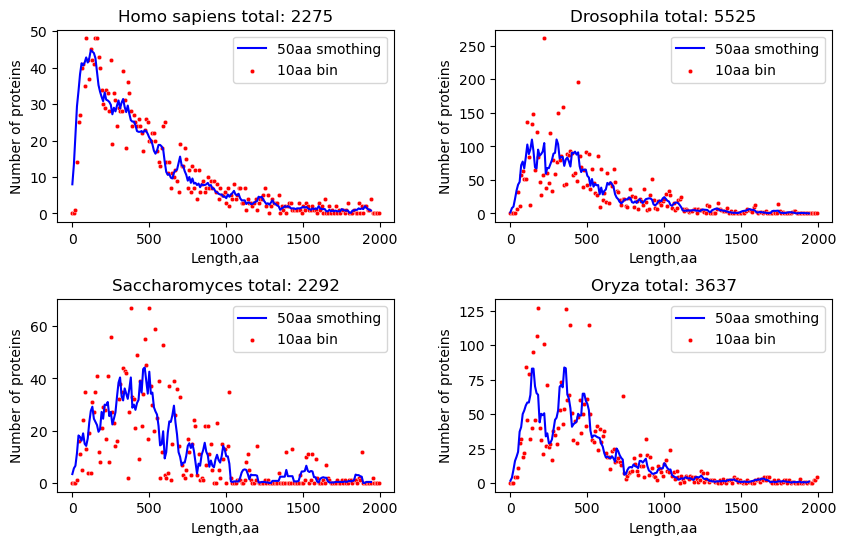

In [36]:
speciesLt = ['Homo sapiens', 'Drosophila', 'Saccharomyces',  'Oryza']
x10Bin = [x for x in range(0, aaLengthLimit, 10)]

numberOfRow, numberOfCol = 2 , 2
fig, axes = plt.subplots(numberOfRow, numberOfCol, figsize=(numberOfCol*5,numberOfRow*3) )
ix, iy = 0, 0
plt.subplots_adjust(
    # left=0.1,
    # bottom=0.1, 
    # right=0.9, 
    # top=0.9, 
    wspace=0.3, 
    hspace=0.4
)
for ii, cSpec in enumerate(speciesLt):
    # if ii == 1: break
    # if ii != 1: continue
    cSpecDf = noDupFrgDf[noDupFrgDf['OS'].str.contains(cSpec)]
    aaLengthLt = list(cSpecDf['aa_length'])
    
    aaLengDic = {}
    aaLength10BinLt = [x - (x % 10) for x in aaLengthLt]
    for ii, cLen in enumerate(aaLength10BinLt):
    # if ii == 1: break
        if cLen in aaLengDic.keys():
            aaLengDic[cLen] += 1
        else:
            aaLengDic[cLen] = 1
       
    aaLengKeys = list(aaLengDic.keys())
    aaLengKeys.sort()
    xyDic = {x:aaLengDic[x] if x in aaLengKeys else 0 for x in x10Bin  }
    y10Bin = [xyDic[x] for x in x10Bin]
    
    xAver = [x10Bin[x] for x in range(len(x10Bin)-5)]
    yAver = [mean(y10Bin[x:x+5]) for x in range(len(xAver))]
    for ii in range(5):
        yAver.append(np.nan)
    
    # wPlot = sns.lineplot(x=x10Bin, y=y10Bin, ax=axes, color='blue')
    wPlot = sns.lineplot(x=x10Bin, y=yAver, ax=axes[ix, iy], color='blue', label='50aa smothing')
    wPlot = sns.scatterplot(x=x10Bin, y=y10Bin, ax=axes[ix, iy], s=10, color='red', label='10aa bin' )
    axes[ix, iy].set_ylabel("Number of proteins", fontsize=10)
    axes[ix, iy].set_xlabel("Length,aa", fontsize=10) 
    axes[ix, iy].set_title(cSpec + ' total: '+ str(len(cSpecDf))) 
    axes[ix, iy].legend()
    
    iy += 1
    if iy == numberOfCol:
        ix += 1
        iy = 0